In [1]:
import os
import re

import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_ROOT = "/glade/derecho/scratch/jshen/2DTurbData/results"
SUB = "NoSGS/NX256/dt0.0002_IC1"

re_names = sorted([
    d for d in os.listdir(DATA_ROOT)
    if os.path.isdir(os.path.join(DATA_ROOT, d, SUB, "stats"))
])

# Load precomputed stats from each directory
stats = {}
for name in re_names:
    m = re.search(r"Re(\d+)", name)
    if not m:
        continue
    rn = int(m.group(1))
    stats_dir = os.path.join(DATA_ROOT, name, SUB, "stats")
    mean = np.load(os.path.join(stats_dir, "mean_full_field.npy"))
    std = np.load(os.path.join(stats_dir, "std_full_field.npy"))
    stats[rn] = {"mean": mean, "std": std}  # each is [u, v]
    print(f"Re={rn}: mean={mean}, std={std}")

re_vals = sorted(stats.keys())

Re=1000: mean=[ 9.24970143e-21 -1.18863253e-19], std=[2.17154729 1.82772797]
Re=2000: mean=[-5.30863500e-21 -6.71034409e-20], std=[2.31050603 1.8254314 ]
Re=3000: mean=[ 1.40665915e-21 -5.79050696e-20], std=[2.33690974 1.83803612]
Re=4000: mean=[-4.88833725e-21 -2.80201209e-20], std=[2.33897626 1.83576022]
Re=5000: mean=[1.98291175e-20 1.68918698e-20], std=[2.38727913 1.8193982 ]


## Global statistics by Reynolds number

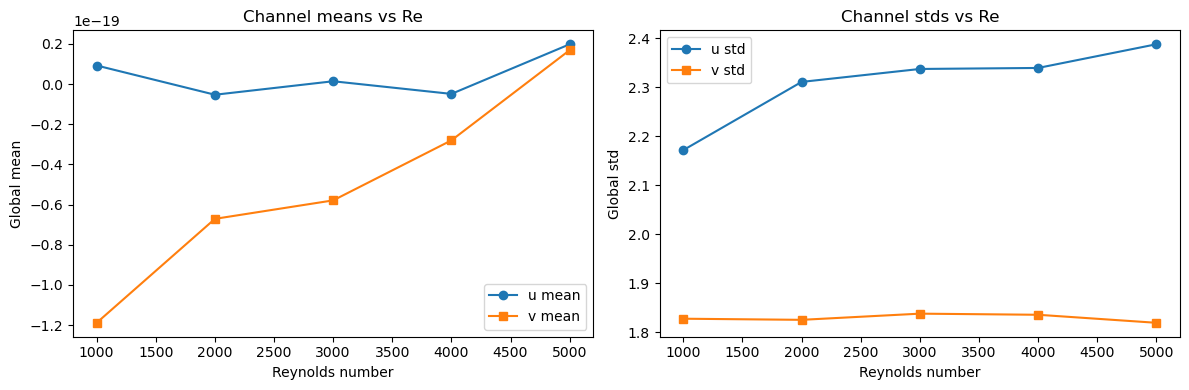

In [3]:
u_means = [stats[r]["mean"][0] for r in re_vals]
v_means = [stats[r]["mean"][1] for r in re_vals]
u_stds = [stats[r]["std"][0] for r in re_vals]
v_stds = [stats[r]["std"][1] for r in re_vals]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax = axes[0]
ax.plot(re_vals, u_means, "o-", label="u mean")
ax.plot(re_vals, v_means, "s-", label="v mean")
ax.set_xlabel("Reynolds number")
ax.set_ylabel("Global mean")
ax.set_title("Channel means vs Re")
ax.legend()
ax.ticklabel_format(style="sci", axis="y", scilimits=(-2, 2))

ax = axes[1]
ax.plot(re_vals, u_stds, "o-", label="u std")
ax.plot(re_vals, v_stds, "s-", label="v std")
ax.set_xlabel("Reynolds number")
ax.set_ylabel("Global std")
ax.set_title("Channel stds vs Re")
ax.legend()

fig.tight_layout()
plt.show()